## SIFT

## Classification using SIFT

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import warnings
warnings.filterwarnings('ignore')

In [2]:
input0 = 'D:/cv/sz/'
temp = ['saola', 'zebra']

In [3]:
#cleanup.clean('SIFT')
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        img = cv2.imread(input0 + i + '/' + filename)
        
        if img is None:
            print(f"Failed to read {filename}")
            continue  # Skip to the next image

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #initialise sift descriptor
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        sift_image = cv2.drawKeypoints(gray, keypoints, img)

        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        #append to the csv file

        csv_data=out.to_csv('D:/cv/sz/SIFT_' + i + '.csv', mode='a', index=False)
        count += 1
        if count == 2000:
            break
    print(i + ": " + str(count))


descriptor shape  saola  :  (2776, 128)
descriptor shape  saola  :  (2014, 128)
descriptor shape  saola  :  (1464, 128)
descriptor shape  saola  :  (1362, 128)
descriptor shape  saola  :  (1565, 128)
descriptor shape  saola  :  (2130, 128)
descriptor shape  saola  :  (1028, 128)
descriptor shape  saola  :  (1177, 128)
descriptor shape  saola  :  (452, 128)
descriptor shape  saola  :  (1367, 128)
descriptor shape  saola  :  (3112, 128)
descriptor shape  saola  :  (3403, 128)
descriptor shape  saola  :  (2143, 128)
descriptor shape  saola  :  (1826, 128)
descriptor shape  saola  :  (789, 128)
descriptor shape  saola  :  (342, 128)
descriptor shape  saola  :  (1313, 128)
descriptor shape  saola  :  (1061, 128)
descriptor shape  saola  :  (542, 128)
descriptor shape  saola  :  (5345, 128)
descriptor shape  saola  :  (94, 128)
descriptor shape  saola  :  (3605, 128)
descriptor shape  saola  :  (906, 128)
descriptor shape  saola  :  (459, 128)
descriptor shape  saola  :  (706, 128)
descripto

In [4]:
data1 = pd.read_csv('D:/cv/sz/SIFT_saola.csv', dtype='uint8')
data2 = pd.read_csv('D:/cv/sz/SIFT_zebra.csv', dtype='uint8')

In [5]:
data1 = data1.astype('uint8')
data2 = data2.astype('uint8')

In [6]:
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1,9,27,39,26,2,0,1,9,11,...,0,0,0,0,0,0,0,0,0,0
1,56,50,5,8,4,0,0,2,157,99,...,0,0,4,0,0,0,0,0,0,1
2,17,1,0,0,0,0,6,37,9,0,...,0,0,29,32,16,23,0,0,0,2
3,41,120,107,120,79,0,0,0,10,8,...,0,0,0,0,2,3,0,0,0,0
4,0,0,0,0,0,0,0,0,0,11,...,2,72,148,34,0,0,0,16,9,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307868,3,0,0,0,0,0,0,3,5,0,...,77,43,0,4,109,66,10,64,50,2
307869,0,0,0,0,0,0,0,0,5,18,...,7,14,0,0,0,0,22,57,83,8
307870,14,52,98,6,1,0,0,0,140,102,...,2,5,0,0,0,0,0,0,0,0
307871,6,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,143,143,0,0,0


In [7]:
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,1,0,0,0,0,0,...,25,56,73,63,6,3,27,102,17,9
1,16,1,0,5,18,4,0,3,11,3,...,3,11,137,137,0,0,0,0,0,38
2,4,0,0,24,113,11,62,96,122,29,...,0,3,25,0,0,0,4,0,0,5
3,13,3,2,27,37,0,0,2,26,1,...,2,8,3,4,3,6,44,95,49,2
4,3,16,112,70,20,28,6,2,22,54,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55600,10,7,20,11,14,12,6,4,20,12,...,8,2,1,6,28,81,32,8,8,1
55601,7,36,83,45,0,0,3,9,3,4,...,15,32,22,18,31,53,35,25,15,13
55602,21,5,5,9,7,15,17,16,16,2,...,0,1,24,32,38,20,3,2,7,8
55603,33,131,27,9,4,1,0,0,35,131,...,2,2,64,37,1,2,6,7,13,7


In [8]:
kmeans1 = KMeans(n_clusters=10)
kmeans1.fit(data1)

kmeans2 = KMeans(n_clusters=10)
kmeans2.fit(data2)

KMeans(n_clusters=10)

In [ ]:
#cleanup.clean('SIFT') # Removes all the generated CSVs

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
import joblib

# Assuming data1 and data2 are your DataFrames
combined_data = pd.concat([data1, data2])
kmeans3 = KMeans(n_clusters=10)
kmeans3.fit(combined_data)

joblib.dump(kmeans3, 'D:/cv/sz/Kmeans_A')


['D:/cv/sz/Kmeans_A']

In [10]:
kmeans3

KMeans(n_clusters=10)

In [13]:
c = 0
for i in temp:
    data = []
    path_to_folder = input0+i
    print(path_to_folder)
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+'/'+fname
        img = cv2.imread(path_to_file)
        if img is None:
            print(f"Failed to read {filename}")
            continue
        
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)
        if i == temp[0]:
            # print("model 1")
            a=kmeans1.predict(array_double)
        elif i == temp[1]:
            # print("model 2")
            a = kmeans2.predict(array_double)

        hist=np.histogram(a,bins=6)  #the range of 10 cluster assignments is divided into 6 intervals.
        data.append(hist[0])
        # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'D:/cv/sz/SIFT_Final_{}.csv'.format(i), mode='a', index=False)
    c += 1

D:/cv/sz/saola
Failed to read n02391049_87.jpg
D:/cv/sz/zebra


In [14]:
out1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,12.0,16.0,22.0,8.0,1.0,7.0,18.0,8.0,10.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,130.0,49.0,1.0,1.0,4.0,13.0,26.0,61.0,153.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,1.0,3.0,37.0,32.0,31.0,11.0,33.0,137.0,86.0,...,2.0,4.0,0.0,0.0,0.0,0.0,32.0,28.0,1.0,0.0
3,0.0,0.0,0.0,1.0,13.0,31.0,16.0,2.0,30.0,0.0,...,1.0,42.0,5.0,27.0,10.0,11.0,30.0,6.0,0.0,1.0
4,18.0,93.0,16.0,8.0,3.0,7.0,1.0,0.0,28.0,38.0,...,6.0,9.0,41.0,49.0,6.0,0.0,0.0,0.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,10.0,7.0,20.0,11.0,14.0,12.0,6.0,4.0,20.0,12.0,...,8.0,2.0,1.0,6.0,28.0,81.0,32.0,8.0,8.0,1.0
283,7.0,36.0,83.0,45.0,0.0,0.0,3.0,9.0,3.0,4.0,...,15.0,32.0,22.0,18.0,31.0,53.0,35.0,25.0,15.0,13.0
284,21.0,5.0,5.0,9.0,7.0,15.0,17.0,16.0,16.0,2.0,...,0.0,1.0,24.0,32.0,38.0,20.0,3.0,2.0,7.0,8.0
285,33.0,131.0,27.0,9.0,4.0,1.0,0.0,0.0,35.0,131.0,...,2.0,2.0,64.0,37.0,1.0,2.0,6.0,7.0,13.0,7.0


In [15]:
len(a)

287

In [16]:
a   # kmeans predicted cluster labels between 0 to 9

array([7, 9, 8, 7, 8, 2, 8, 1, 7, 9, 7, 8, 1, 9, 7, 6, 2, 7, 2, 8, 9, 7,
       8, 7, 8, 9, 7, 6, 2, 9, 1, 2, 4, 2, 4, 4, 4, 7, 4, 6, 8, 6, 1, 6,
       6, 8, 6, 8, 1, 4, 4, 0, 0, 1, 2, 9, 4, 9, 9, 8, 1, 7, 6, 1, 1, 6,
       1, 5, 9, 6, 5, 4, 8, 8, 9, 2, 6, 6, 8, 9, 6, 5, 5, 5, 5, 2, 1, 6,
       4, 5, 7, 5, 0, 3, 6, 0, 8, 9, 4, 4, 5, 4, 4, 3, 7, 5, 9, 9, 3, 0,
       2, 1, 6, 8, 0, 0, 0, 2, 2, 8, 4, 3, 3, 3, 8, 4, 4, 5, 3, 5, 3, 2,
       5, 5, 5, 5, 5, 0, 5, 3, 0, 9, 7, 2, 3, 8, 9, 8, 8, 9, 8, 0, 7, 2,
       6, 2, 5, 8, 8, 3, 8, 5, 4, 4, 2, 9, 6, 1, 6, 1, 6, 1, 9, 6, 4, 4,
       5, 5, 5, 6, 8, 3, 8, 1, 6, 1, 9, 6, 8, 8, 7, 5, 4, 8, 2, 5, 5, 2,
       0, 9, 9, 7, 4, 4, 8, 7, 7, 6, 6, 4, 5, 6, 1, 6, 6, 6, 5, 4, 4, 6,
       9, 0, 3, 4, 6, 1, 4, 4, 6, 5, 5, 4, 5, 4, 4, 5, 6, 4, 4, 4, 5, 9,
       4, 2, 8, 9, 8, 9, 8, 9, 8, 4, 4, 9, 2, 9, 4, 6, 1, 5, 1, 6, 4, 3,
       3, 9, 2, 6, 1, 1, 0, 2, 4, 5, 2, 8, 1, 1, 6, 1, 9, 8, 9, 1, 3, 9,
       9])

In [17]:
hist     # Clusters distributed in 6 bins

(array([41, 24, 58, 35, 57, 72], dtype=int64),
 array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ]))

In [18]:
len(data)

49

In [19]:
data      # All features histograms are appended in data

[array([259,  75, 243, 133, 268, 419], dtype=int64),
 array([67, 47, 70, 12, 70, 87], dtype=int64),
 array([143,  43, 213,  75, 117, 261], dtype=int64),
 array([71, 73, 56, 13, 66, 76], dtype=int64),
 array([47, 53, 50, 31, 64, 64], dtype=int64),
 array([171,  76, 137,  28, 217, 377], dtype=int64),
 array([74, 63, 99, 48, 87, 88], dtype=int64),
 array([ 36,  78, 105,  69,  90,  35], dtype=int64),
 array([177,  66, 116,  51, 167, 213], dtype=int64),
 array([115,  45, 150, 100,  97, 156], dtype=int64),
 array([109,  24, 184, 141,  89, 116], dtype=int64),
 array([101,  52, 163, 104, 122, 178], dtype=int64),
 array([33, 33, 37,  8, 90, 34], dtype=int64),
 array([43, 13, 25, 13, 46, 74], dtype=int64),
 array([149,  46, 133,  79, 150, 247], dtype=int64),
 array([43, 24, 65, 38, 67, 47], dtype=int64),
 array([111,  64, 135,  54, 100, 140], dtype=int64),
 array([108,  31, 128,  44, 112, 102], dtype=int64),
 array([109,  44, 115,  64, 107, 155], dtype=int64),
 array([73, 35, 78, 56, 63, 80], dt

In [20]:
Output

,0,1,2,3,4,5,Class
0,259,75,243,133,268,419,1
1,67,47,70,12,70,87,1
2,143,43,213,75,117,261,1
3,71,73,56,13,66,76,1
4,47,53,50,31,64,64,1
5,171,76,137,28,217,377,1
6,74,63,99,48,87,88,1
7,36,78,105,69,90,35,1
8,177,66,116,51,167,213,1
9,115,45,150,100,97,156,1


In [47]:
import pandas as pd

dfp = pd.read_csv('D:/cv/sz/SIFT_Final_saola.csv')
dfn = pd.read_csv('D:/cv/sz/SIFT_Final_zebra.csv')

df = pd.concat([dfp, dfn], ignore_index=True)
csv_data = df.to_csv('D:/cv/sz/SIFT_Final.csv', index=False)


In [48]:
df

,0,1,2,3,4,5,Class
0,535,323,551,317,646,404,0
1,449,180,358,194,537,296,0
2,327,116,290,120,286,325,0
3,307,171,257,173,258,196,0
4,419,114,267,122,361,282,0
...,...,...,...,...,...,...,...
291,84,55,104,82,108,87,1
292,171,40,123,43,154,301,1
293,62,21,75,10,50,113,1
294,114,27,167,80,97,147,1


In [49]:
df = pd.read_csv('D:/cv/animals/SIFT_Final.csv')
X = df.iloc[:, :-1]  # selects all rows (:) and all but the last column (:-1) of the DataFrame df.
Y = df.iloc[:, -1]    #  selects all rows (:) and the last column (-1) of the DataFrame df.

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

In [50]:
X

,0,1,2,3,4,5
0,68,62,74,45,46,112
1,146,72,124,69,92,147
2,394,121,460,121,185,371
3,35,35,48,26,42,35
4,49,12,31,68,15,78
...,...,...,...,...,...,...
441,72,67,65,9,89,54
442,188,72,141,62,158,209
443,160,75,119,59,124,134
444,101,54,60,17,89,99


In [51]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
441    1
442    1
443    1
444    1
445    1
Name: Class, Length: 446, dtype: int64

In [52]:
x_train

,0,1,2,3,4,5
138,37,35,18,73,37,61
334,188,139,164,77,143,151
0,68,62,74,45,46,112
60,89,28,116,58,77,121
315,19,11,18,6,14,18
...,...,...,...,...,...,...
400,95,59,115,48,242,257
118,37,9,39,26,28,51
189,213,84,251,166,128,233
206,506,135,229,49,583,207


In [53]:
y_train

138    0
334    1
0      0
60     0
315    1
      ..
400    1
118    0
189    0
206    0
355    1
Name: Class, Length: 356, dtype: int64

In [54]:
x_test

,0,1,2,3,4,5
66,128,51,96,68,125,130
224,25,36,30,4,48,34
353,77,47,62,26,155,103
309,581,258,508,128,332,513
443,160,75,119,59,124,134
...,...,...,...,...,...,...
18,371,162,223,41,181,141
312,334,126,314,92,96,231
263,113,84,86,37,113,92
430,101,51,77,15,98,65


In [55]:
y_test

66     0
224    1
353    1
309    1
443    1
      ..
18     0
312    1
263    1
430    1
436    1
Name: Class, Length: 90, dtype: int64

### Standardization

StandardScaler() is a class in the scikit-learn library that is used for standardizing data. Standardization is a common preprocessing step in machine learning that involves scaling features so that they have zero mean and unit variance. This can be useful for improving the performance of certain machine learning algorithms, such as those that are sensitive to the scale of the input data.

### x' = (x - mean(x)) / std(x)

The standardization process involves subtracting the mean of each feature from its values, and then dividing the result by the standard deviation of the feature. This results in a new feature that has a mean of 0 and a standard deviation of 1.

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_X = sc.fit_transform(x_train)
test_X = sc.transform(x_test)

### The StandardScaler() class
has a fit() method that calculates the mean and standard deviation of each feature in the training data

 and a transform() method that scales the data based on the calculated means and standard deviations.

 The fit_transform() method can be used to perform both steps in a single operation.


In [57]:
train_X

array([[-0.7812438 , -0.7309402 , -1.00175291,  0.22033882, -0.92242744,
        -0.72962758],
       [ 0.0616202 ,  1.00739035, -0.04110514,  0.30773784,  0.16865246,
        -0.13877032],
       [-0.6082055 , -0.27964285, -0.63328527, -0.39145432, -0.82978858,
        -0.39480846],
       ...,
       [ 0.20116722,  0.08808092,  0.53133566,  2.25236606,  0.01425436,
         0.3995663 ],
       [ 1.83665831,  0.94053148,  0.38658052, -0.3040553 ,  4.69766335,
         0.2288742 ],
       [-0.35143898,  1.09096393, -0.31745587,  0.08924029,  1.0126954 ,
        -0.32259257]])

In [58]:
test_X

array([[-0.27329265, -0.46350473, -0.48853013,  0.11109005, -0.01662526,
        -0.27663701],
       [-0.84822637, -0.71422548, -0.92279556, -1.28729429, -0.80920217,
        -0.90688476],
       [-0.55796857, -0.5303636 , -0.71224263, -0.80659967,  0.29217093,
        -0.45389419],
       [ 2.25529937,  2.99644164,  2.22233894,  1.42207536,  2.1140685 ,
         2.2377889 ],
       [-0.09467246, -0.06235153, -0.33719521, -0.08555775, -0.02691847,
        -0.25037669],
       [-0.45749472, -0.37993115, -0.46879079, -0.47885334, -0.2327826 ,
        -0.63115137],
       [-0.63053302, -0.59722246, -0.71882241, -0.36960457, -1.03565272,
        -0.62458629],
       [-0.77008004, -0.8312285 , -0.9754338 , -1.22174502, -0.7062701 ,
        -0.96597048],
       [-0.71426123, -0.41336058, -0.71224263, -0.36960457, -0.73714972,
        -0.76245298],
       [-0.48540412, -0.39664586, -0.38983344,  0.28588809, -0.80920217,
        -0.42106879],
       [ 5.24160561,  5.38664614,  5.45959035,  4.

In [59]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier


model_dt = DecisionTreeClassifier(max_depth=6)

model_dt.fit(x_train, y_train)

joblib.dump(model_dt,"D:/cv/sz/model_dt_A")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results

print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test)) 
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))


Decision Tree Results
Decision Tree Accuracy:  75.55555555555556 %
Train Accuracy: 0.9129213483146067
Test Accuracy: 0.7555555555555555
Precision Score:  0.7555555555555555
Recall Score:  0.7555555555555555
F2 Score:  0.7555555555555555
F1 Score:  0.7555555555555555
Confusion Matrix: 
[[29  8]
 [14 39]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### Decision Tree Classifier  with hyper parameter tuning

DecisionTreeClassifier is a class in scikit-learn that implements a decision tree algorithm for classification tasks. It builds a decision tree model by recursively splitting the data into smaller subsets based on the features of the input data and their corresponding labels.

The DecisionTreeClassifier class takes several arguments, some of the most commonly used ones are:

max_depth: controls the maximum depth of the decision tree. A smaller value of max_depth can help prevent overfitting by limiting the complexity of the model, but may also lead to underfitting if the decision tree is too shallow. The default value is None, which means that the decision tree will be grown until all leaves are pure (i.e., contain only instances of one class) or until all leaves contain fewer than min_samples_split samples.

min_samples_split: controls the minimum number of samples required to split an internal node. A smaller value of min_samples_split can result in a more complex decision tree that can better fit the training data, but may also be more prone to overfitting. The default value is 2.

min_samples_leaf: controls the minimum number of samples required to be at a leaf node. A smaller value of min_samples_leaf can result in a decision tree with more leaves and finer-grained predictions, but may also lead to overfitting. The default value is 1.

criterion: controls the measure used to evaluate the quality of a split. The two most commonly used criteria are "gini" and "entropy". "gini" measures the impurity of a node based on the probability of misclassifying a random sample from the node, while "entropy" measures the impurity based on the information gain achieved by splitting the node. The default criterion is "gini".

splitter: controls the strategy used to choose the feature to split on at each node. The two most commonly used strategies are "best" (which chooses the feature that maximizes a certain criterion, such as the Gini impurity or information gain) and "random" (which chooses a random feature subset at each node). The default strategy is "best".

To tune the hyperparameters of the DecisionTreeClassifier, you can use techniques such as grid search or random search to explore different combinations of hyperparameter values and find the ones that give the best performance on a validation set. For example, you can create a grid of hyperparameter values to search over, and use cross-validation to evaluate the performance of each combination

In [60]:
#Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

# Define the hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


joblib.dump(grid_search,"D:/cv/sz/model_dt_A")

#predicting the traget variable using testing variables
y_pred1 = grid_search.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",grid_search.score(x_train, y_train))
print("Test Accuracy:",grid_search.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(grid_search,x_test, y_test))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best accuracy: 0.7922535211267606
Decision Tree Results
Decision Tree Accuracy:  74.44444444444444 %
Train Accuracy: 0.8932584269662921
Test Accuracy: 0.7444444444444445
Precision Score:  0.7444444444444445
Recall Score:  0.7444444444444445
F2 Score:  0.7444444444444445
F1 Score:  0.7444444444444445
Confusion Matrix: 
[[29  8]
 [15 38]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### Random Forest classifier

In [61]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"D:/cv/sz/model_rf_A")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.8111111111111111
Precision Score:  0.8111111111111111
Recall Score:  0.8111111111111111
F1 Score:  0.8111111111111111
Confusion Matrix: 
[[31  6]
 [11 42]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### Random Forest classifier - Hyper parameter tuning

n_estimators: The number of decision trees in the forest. The default is 100.

criterion: The function used to measure the quality of a split. The default is "gini", which uses the Gini impurity. Another option is "entropy", which uses information gain.

max_depth: The maximum depth of the decision trees. The default is None, which means that the trees are allowed to grow until all leaves are pure or until min_samples_split is reached.

min_samples_split: The minimum number of samples required to split an internal node. The default is 2.

min_samples_leaf: The minimum number of samples required to be at a leaf node. The default is 1.

max_features: The number of features to consider when looking for the best split. The default is "auto", which means max_features=sqrt(n_features).

bootstrap: Whether or not to bootstrap samples when building trees. The default is True.

oob_score: Whether or not to calculate the out-of-bag score. The default is False.

n_jobs: The number of CPU cores to use for parallel processing. The default is 1, which means that the training is performed sequentially.

In [62]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

model_rf = RandomForestClassifier()


# Perform grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=5)
grid_search_rf.fit(x_train, y_train)


print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

joblib.dump(grid_search_rf,"D:/cv/sz/model_RF_tunned_A")

y_pred2 = grid_search_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",grid_search_rf.score(x_train, y_train))
print("Test Accuracy:",grid_search_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_rf,x_test, y_test))

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.8232785602503911
Random Forest Clasifier
Train Accuracy: 0.9044943820224719
Test Accuracy: 0.8222222222222222
Precision Score:  0.8222222222222222
Recall Score:  0.8222222222222222
F1 Score:  0.8222222222222222
Confusion Matrix: 
[[28  9]
 [ 7 46]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### KNN classifier

n_neighbors: the number of neighbors to consider when making predictions. This is typically set to an odd number to avoid ties.

weights: the weight function used in prediction. The default is 'uniform', which assigns equal weight to all neighbors. 'distance' assigns weights proportional to the inverse of the distance from the new data point, which can be useful when the data is unevenly distributed.

metric: the distance metric used to compute distances between data points. The default is 'minkowski', which is equivalent to the Euclidean distance for p=2. Other options include 'manhattan' (L1 distance) and 'chebyshev' (maximum distance).

algorithm: the algorithm used to compute nearest neighbors. The default is 'auto', which chooses the most appropriate algorithm based on the values of n_samples and n_features. 'ball_tree' and 'kd_tree' are alternative algorithms that can be faster for high-dimensional data, while 'brute' simply computes distances between all pairs of points.

In [ ]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 13)
model_knn.fit(x_train, y_train)


joblib.dump(model_knn,"D:/cv/sz/modelA_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

### KNN classifier - Hyper Parameter Tuning

In [ ]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {'n_neighbors': [5, 7, 13, 17, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
#model_knn.fit(x_train, y_train)
grid_search_knn.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)

joblib.dump(grid_search_knn,"D:/cv/sz/modelA_knn_tunned")

y_pred3 = grid_search_knn.predict(x_test)

print("KNN")
print("Train Accuracy:",grid_search_knn.score(x_train, y_train))
print("Test Accuracy:",grid_search_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_knn,x_test, y_test))

### Support Vector Machine (SVM)

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Define SVM models with different kernels
svc_models = [
    SVC(kernel='linear'),
    SVC(kernel='poly', degree=2),
    SVC(kernel='poly', degree=3),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]

# Train and evaluate SVM models
for svc in svc_models:
    svc.fit(x_train, y_train)
    accuracy = svc.score(x_test, y_test)
    print(f"{svc.kernel} kernel accuracy: {accuracy:.3f}")





linear kernel accuracy: 0.778
poly kernel accuracy: 0.533
poly kernel accuracy: 0.522
rbf kernel accuracy: 0.822
sigmoid kernel accuracy: 0.567


### Naive Bayes Classifier

Gaussian Naive Bayes (GaussianNB): It is suitable for continuous data that follows a Gaussian distribution.

Multinomial Naive Bayes (MultinomialNB): It is suitable for discrete data such as text.

Bernoulli Naive Bayes (BernoulliNB): It is also suitable for discrete data but assumes that the features are binary.

The main hyperparameters to tune for Naive Bayes classifiers are the smoothing parameter (alpha) and the binarization threshold (for BernoulliNB). alpha is a regularization parameter that controls the amount of smoothing applied to the probability estimates. A higher value of alpha results in stronger regularization and a smoother decision boundary, while a lower value of alpha allows the model to fit the training data more closely.

In [43]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define Gaussian Naive Bayes classifier
gnb = MultinomialNB()

# Define hyperparameter grid for alpha
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# Perform grid search with 5-fold cross-validation
grid_search_naive = GridSearchCV(gnb, params, cv=5)
grid_search_naive.fit(x_train, y_train)


joblib.dump(grid_search_naive,"D:/cv/sz/modelA_Naive_Bayes_Tunning")
y_pred3 = grid_search_naive.predict(x_test)
print("KNN")
print("Train Accuracy:",grid_search_naive.score(x_train, y_train))
print("Test Accuracy:",grid_search_naive.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_naive,x_test, y_test))



KNN
Train Accuracy: 0.7808988764044944
Test Accuracy: 0.7555555555555555
Precision Score:  0.7555555555555555
Recall Score:  0.7555555555555555
F1 Score:  0.7555555555555555
Confusion Matrix: 
[[29  8]
 [14 39]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [46]:
GradientBoostingClassifier

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
Adaboost

In [ ]:
XGBoostClassifier

### LGBMClassifier

LGBM
Train Accuracy: 1.0
Test Accuracy: 0.875
Precision Score:  0.875
Recall Score:  0.875
F1 Score:  0.875
Confusion Matrix: 
[[34  3]
 [ 7 36]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000023897F1DDC0>


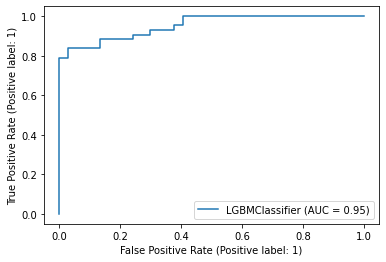

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import re
newdf = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

nX = newdf.iloc[:, :-1]
nY = newdf.iloc[:, -1]

# train test split
nx_train, nx_test, ny_train, ny_test = train_test_split(nX, nY, train_size=0.8, random_state=5)


model_lgbm = LGBMClassifier()
model_lgbm.fit(nx_train, ny_train)
joblib.dump(model_lgbm,"./Trained_Models/SIFT/model_lgbm_A")
# Predicting the Target variable
pred = model_lgbm.predict(nx_test)
print("LGBM")
print("Train Accuracy:",model_lgbm.score(nx_train, ny_train))
print("Test Accuracy:",model_lgbm.score(nx_test, ny_test))
print("Precision Score: ",metrics.precision_score(ny_test, pred, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(ny_test, pred, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(ny_test, pred, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(ny_test, pred,))
print("ROC curve ",metrics.plot_roc_curve(model_lgbm, nx_test, ny_test))

In [41]:
def siftFeatures(path):
    img = cv2.imread(path)
    gray = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (128, 128))

    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    #sift_image = cv2.drawKeypoints(gray, keypoints, img)
    #convert the descriptor array into a dataframe format
    return pd.DataFrame(descriptors).astype('uint8')

In [45]:
from sklearn.cluster import KMeans
import joblib

# Create and fit a K-Means model (replace this with your actual model creation and fitting)
kmeans_model = KMeans(n_clusters=10)
kmeans_model.fit(data)

# Save the K-Means model to a .pkl file
joblib.dump(kmeans_model, 'D:/cv/sz/Kmeans_A.pkl')

['D:/cv/sz/Kmeans_A.pkl']

Detected image: saola


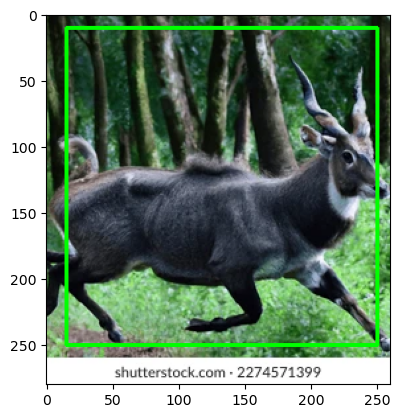

In [45]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function for feature reduction with PCA
def featureReductionA(features):
    n_components = 6  # The number of components you want after reduction
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Load the KNeighborsClassifier model
modelA = joblib.load('D:/cv/sz/modelA_knn_tunned')

# Get the SIFT features for an image
input_features = siftFeatures('D:/cv/sz/saola/s3.jpg')

# Reduce the dimensionality of input_features using PCA
input_features_reduced = featureReductionA(input_features)

# Predict using the reduced features
modelA_pred = modelA.predict(input_features_reduced)

# Check the class label with the highest predicted probability
if modelA_pred[0] == 0:
    print("Detected image: saola")
    # Assuming you have the coordinates x1, y1, x2, y2 of the detected saola
    x1, y1, x2, y2 = 15, 10, 250, 250  # Example coordinates
elif modelA_pred[0] == 1:
    print("Detected image: zebra")
    # Assuming you have the coordinates x1, y1, x2, y2 of the detected zebra
    x1, y1, x2, y2 = 50, 0, 250, 250  # Example coordinates
else:
    print("Unable to detect the animal")

# Load and display the image
img_path = cv2.imread('D:/cv/sz/saola/s3.jpg')

# Draw a square around the detected animal
cv2.rectangle(img_path, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB))
plt.show()


In [48]:
modelA_proba = modelA.predict_proba(input_features_reduced)

In [49]:
modelA_proba

array([[0.71125942, 0.28874058],
       [0.57348183, 0.42651817],
       [0.85553038, 0.14446962],
       [0.71312595, 0.28687405],
       [0.57231773, 0.42768227],
       [0.        , 1.        ],
       [0.84696137, 0.15303863],
       [0.28315459, 0.71684541],
       [0.70961277, 0.29038723],
       [0.855998  , 0.144002  ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.42399916, 0.57600084],
       [0.42278545, 0.57721455],
       [1.        , 0.        ],
       [0.28523313, 0.71476687],
       [1.        , 0.        ],
       [0.14345495, 0.85654505],
       [0.85952754, 0.14047246],
       [0.42870826, 0.57129174],
       [1.        , 0.        ],
       [0.14054501, 0.85945499],
       [0.57497621, 0.42502379],
       [0.        , 1.        ],
       [0.58123119, 0.41876881],
       [0.        , 1.        ],
       [0.56802428, 0.43197572],
       [0.70796192, 0.29203808],
       [0.        , 1.        ],
       [1.

In [ ]:
import cv2

def siftFeatures(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))  # Resize the image if needed

    # Initialize SIFT descriptor
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return descriptors

# Example of how to use the updated siftFeatures function
#image_path = 'your_image.jpg'  # Replace with the path to your image
#image = cv2.imread(image_path)
#features = siftFeatures(image)'''

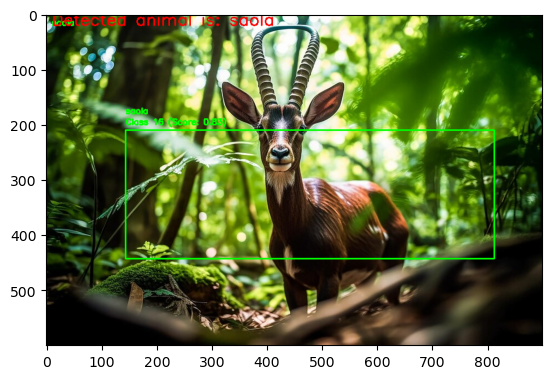

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import PCA

# Load the pre-trained SSD model from TensorFlow Hub
ssd_model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
ssd_model = hub.load(ssd_model_url)

# Load the KNeighborsClassifier model
knn_model = joblib.load('D:/cv/SIFT_LAB15/modelA_knn_tunned')

# Define a function for feature reduction with PCA
def featureReductionA(features):
    n_components = 6  # The number of components you want after reduction
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Load the image
img_path = 'D:/cv/sz/saola/s37.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to the expected data type (tf.uint8)
#img = tf.image.convert_image_dtype(img, tf.uint8)

# Prepare the image for object detection
input_img = img[tf.newaxis, ...]

# Perform object detection
results = ssd_model(input_img)

# Get class IDs, scores, and bounding boxes of detected objects
class_ids = results["detection_classes"][0].numpy()
scores = results["detection_scores"][0].numpy()
boxes = results["detection_boxes"][0].numpy()

# Set a threshold for object detection
threshold = 0.5

# Lists to store the detected objects
detected_objects = []

# Draw boxes and labels for detected objects
for i in range(len(class_ids)):
    if scores[i] > threshold:
        class_id = int(class_ids[i])
        label = f"Class {class_id} (Score: {scores[i]:.2f})"
        box = boxes[i]
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
        x1, y1, x2, y2 = int(x1 * img.shape[1]), int(y1 * img.shape[0]), int(x2 * img.shape[1]), int(y2 * img.shape[0])

        # Crop the detected object from the image
        detected_object = img[y1:y2, x1:x2]
        detected_objects.append(detected_object)

        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        img = cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
# Define a function to classify detected objects
def classify_objects(detected_objects, knn_model):
    labels = []
    for detected_object in detected_objects:
        input_features = siftFeatures(detected_object)
        input_features_reduced = featureReductionA(input_features)
        knn_pred = knn_model.predict(input_features_reduced)
        label = "saola" if knn_pred[0] == 0 else "zebra"
        labels.append(label)
    return labels
# Define a function to annotate the image with object labels
def annotate_image_with_labels(image, labels):
    for i, label in enumerate(labels):
        y_offset = 20 + i * 20
        image = cv2.putText(image, label, (10, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

# Classify the detected objects using the KNN model
for i, detected_object in enumerate(detected_objects):
    input_features = siftFeatures(detected_object)
    input_features_reduced = featureReductionA(input_features)
    knn_pred = knn_model.predict(input_features_reduced)
    label = "saola" if knn_pred[0] == 0 else "zebra"

    # Annotate the image with the classification results for the detected objects
    img = cv2.putText(img, label, (x1, y1 - 30 - i * 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Classify the detected objects using the KNN model
labels = classify_objects(detected_objects, knn_model)

# Annotate the image with the classification results for the detected objects
img = annotate_image_with_labels(img, labels)

# Add the detected animal label to the output
detected_animal_label = "Detected animal is: " + labels[0] if labels else "No animals detected"
img = cv2.putText(img, detected_animal_label, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display the image with detected objects and classifications
plt.imshow(img)
plt.show()